<a href="https://colab.research.google.com/github/chungbinpark/ML-tutorial/blob/main/4_CNN%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 컨볼루션 신경망(CNN): 이미지 인식

## 1. 이미지를 인식하는 원리

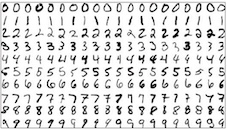

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다.
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

In [ ]:
print (X_train.shape)
print (y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
y_train[5999]

np.uint8(9)

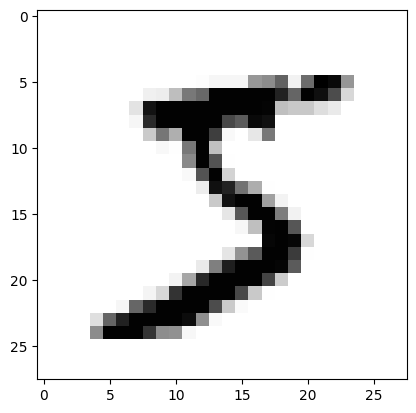

In [ ]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [ ]:
# 이미지가 인식되는 원리를 알아봅시다.
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-4s" % i)
    sys.stdout.write('\n')

    #0; 흰색 255: 검은색

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   3   18  18  18  126 136 175 26  166 255 247 127 0   0   0   0   
0   0   0   0   0   0   0   0   30  36  94  154 170 253 253 253 253 253 225 172 253 242 195 64  0   0   0   0   
0   0   0   0   0   0   0   49  238 253 253 253 253 253 253 253 253 251 93  82  82  56  39  0   0   0   0   0   
0   0   0   0   0   0   0   18  219 253 253 253 253 253 198 182 247 241 0   0   0   0   0   0   

In [ ]:
print (X_train[0][5])

[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]


In [ ]:
X_train.shape # --> 60000, 784

(60000, 28, 28)

#**784 개의 속성 데이터로 숫자 표현**

In [ ]:
# 차원 변환 과정을 실습해 봅니다.
print (X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 784)
print (X_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
X_train= X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스 값을 확인해 봅니다.

print("class : %d " % (y_train[0]))
# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print (y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## **딥러닝 기본 프레임 만들기**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_MLP.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18583, saving model to ./MNIST_MLP.keras

Epoch 2: val_loss improved from 0.18583 to 0.13478, saving model to ./MNIST_MLP.keras

Epoch 3: val_loss improved from 0.13478 to 0.11350, saving model to ./MNIST_MLP.keras

Epoch 4: val_loss improved from 0.11350 to 0.10092, saving model to ./MNIST_MLP.keras

Epoch 5: val_loss improved from 0.10092 to 0.09436, saving model to ./MNIST_MLP.keras

Epoch 6: val_loss improved from 0.09436 to 0.08752, saving model to ./MNIST_MLP.keras

Epoch 7: val_loss improved from 0.08752 to 0.08573, saving model to ./MNIST_MLP.keras

Epoch 8: val_loss improved from 0.08573 to 0.08289, saving model to ./MNIST_MLP.keras

Epoch 9: val_loss did not improve from 0.08289

Epoch 10: val_loss improved from 0.08289 to 0.08224, saving model to ./MNIST_MLP.keras

Epoch 11: val_loss did not improve from 0.08224

Epoch 12: val_loss improved from 0.08224 to 0.07990, saving model to ./MNIST_MLP.keras

Epoch 13: val_loss did not improve

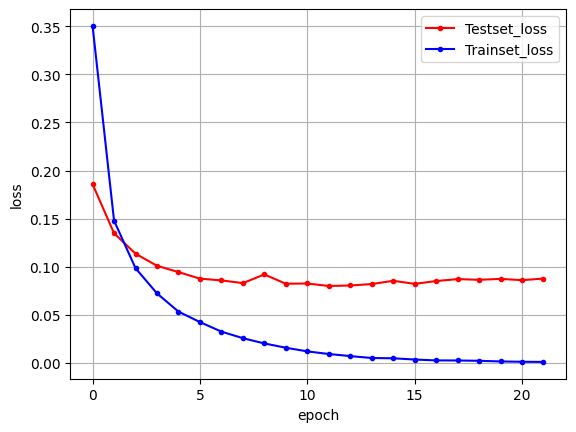

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# **CNN 인풋 데이터 구조 이해하기: 그림 데이터 그대로 넣기**



In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [ ]:
X_train_reshape = X_train.reshape(X_train.shape[0], 28, 28, 1)

In [ ]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-4s" % i)
    sys.stdout.write('\n')

    #0; 흰색 255: 검은색

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   3   18  18  18  126 136 175 26  166 255 247 127 0   0   0   0   
0   0   0   0   0   0   0   0   30  36  94  154 170 253 253 253 253 253 225 172 253 242 195 64  0   0   0   0   
0   0   0   0   0   0   0   49  238 253 253 253 253 253 253 253 253 251 93  82  82  56  39  0   0   0   0   0   
0   0   0   0   0   0   0   18  219 253 253 253 253 253 198 182 247 241 0   0   0   0   0   0   

In [ ]:
X_train_reshape[0][5][12][0]

np.uint8(3)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu')) #Fully connected layer
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


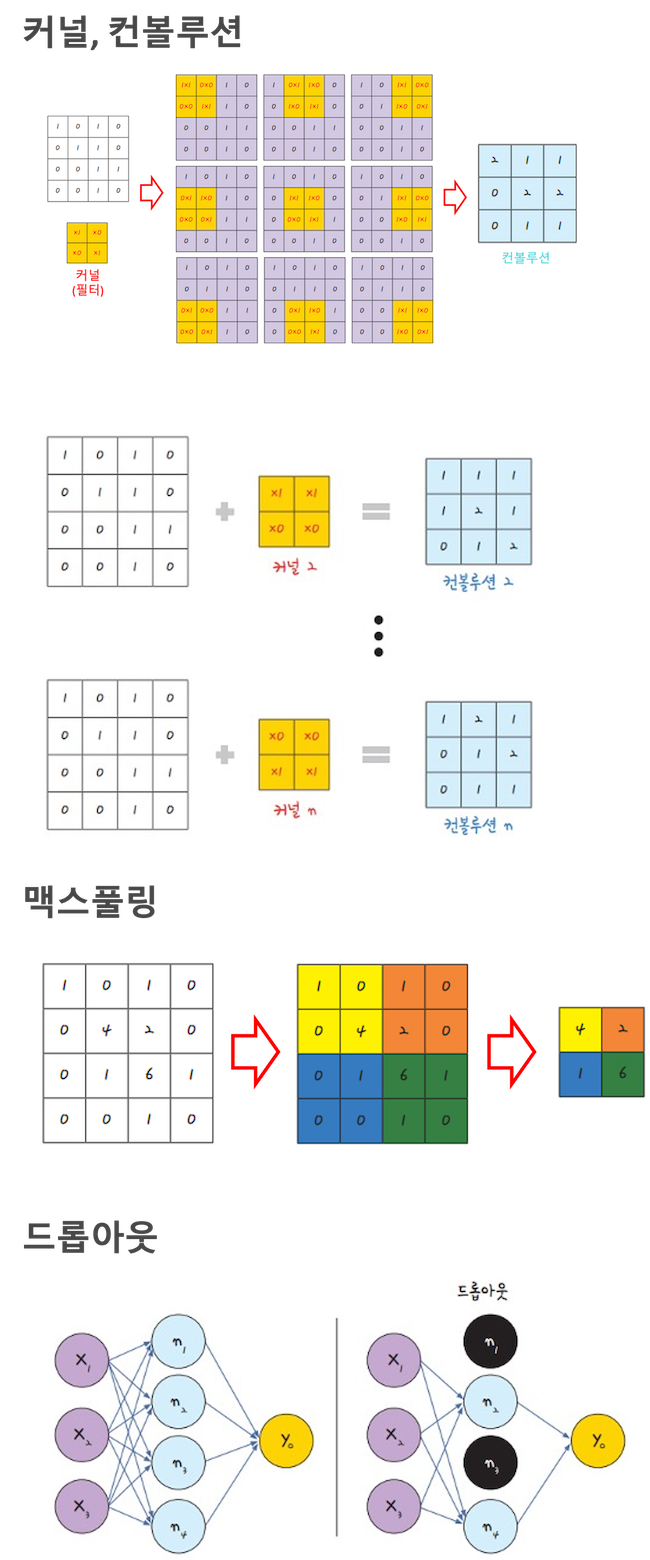

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_CNN.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.08015, saving model to ./MNIST_CNN.keras

Epoch 2: val_loss improved from 0.08015 to 0.05637, saving model to ./MNIST_CNN.keras

Epoch 3: val_loss improved from 0.05637 to 0.04969, saving model to ./MNIST_CNN.keras

Epoch 4: val_loss improved from 0.04969 to 0.04601, saving model to ./MNIST_CNN.keras

Epoch 5: val_loss improved from 0.04601 to 0.04083, saving model to ./MNIST_CNN.keras

Epoch 6: val_loss improved from 0.04083 to 0.04043, saving model to ./MNIST_CNN.keras

Epoch 7: val_loss improved from 0.04043 to 0.03968, saving model to ./MNIST_CNN.keras

Epoch 8: val_loss did not improve from 0.03968

Epoch 9: val_loss did not improve from 0.03968

Epoch 10: val_loss did not improve from 0.03968

Epoch 11: val_loss did not improve from 0.03968

Epoch 12: val_loss did not improve from 0.03968

Epoch 13: val_loss improved from 0.03968 to 0.03927, saving model to ./MNIST_CNN.keras

Epoch 14: val_loss did not improve from 0.03927

Epoch 15: val_

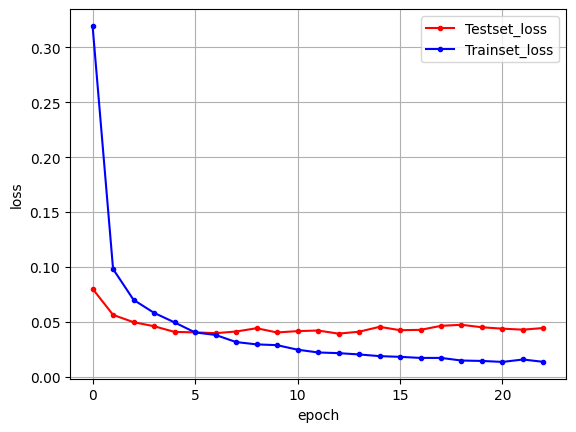

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

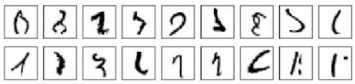

In [ ]:
!pip install tf-explain
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('./MNIST_CNN.keras')
model.summary()  # 마지막 Conv 레이어 이름 확인용

In [ ]:
import numpy as np
from tf_explain.core.grad_cam import GradCAM
from tensorflow.keras.preprocessing.image import load_img, img_to_array

explainer = GradCAM()

img = X_test[0]
img = img_to_array(img)
img = np.expand_dims(img, axis=0)

# ✅ 모델 강제 build
model(np.zeros_like(img))

data = ([img], None)
index = np.argmax(y_test[0])

grid = explainer.explain(
    data,
    model,
    class_index=index,
    layer_name="conv2d_1"
)
